#1. Выбрать наборы данных и обосновать их выбор

Сам датасет: https://www.kaggle.com/datasets/CooperUnion/cardataset. В нём изложены данные об автомобилях, а именно: модель, год выпуска, двигатель и другие характеристики автомобиля.

Задача, решаемая регрессией: предсказание стоимости автомобиля по его характеристикам (оценка стоимости автомобиля полезна и применима в реальной жизни).

Задача, решаемая классификацией: определение года выпуска автомобиля (в разные времена выпускались разные автомобили, что может сказать нам о перспективных направлениях каждого времени).

#2. Выбрать метрики качества и обосновать их выбор

Подключаем необходимые библиотеки

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Сам датасет

In [ ]:
data = pd.read_csv('data.csv')
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


Разделение на категориальные и числовые признаки для задачи регрессии

In [ ]:
num_cols1 = [
    'Year',
    'Engine HP',
    'Engine Cylinders',
    'Number of Doors',
    'highway MPG',
    'city mpg',
    'Popularity',
]

cat_cols1 = [
    'Make',
    'Model',
    'Engine Fuel Type',
    'Transmission Type',
    'Driven_Wheels',
    'Market Category',
    'Vehicle Size',
    'Vehicle Style',
]

target_col1 = 'MSRP' # розничная цена автомобиля

cols1 = num_cols1 + cat_cols1 + [target_col1]

Разделение на категориальные и числовые признаки для задачи классификации

In [ ]:
num_cols2 = [
    'Engine HP',
    'Engine Cylinders',
    'Number of Doors',
    'highway MPG',
    'city mpg',
    'Popularity',
    'MSRP'
]

cat_cols2 = [
    'Make',
    'Model',
    'Engine Fuel Type',
    'Transmission Type',
    'Driven_Wheels',
    'Vehicle Size',
    'Vehicle Style',
    'Market Category',
]

target_col2 = 'Year'

cols2 = num_cols2 + cat_cols2 + [target_col2]

In [ ]:
data1 = data[cols1]
data1.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,46135
1,2011,300.0,6.0,2.0,28,19,3916,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,40650
2,2011,300.0,6.0,2.0,28,20,3916,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,36350
3,2011,230.0,6.0,2.0,28,18,3916,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe,29450
4,2011,230.0,6.0,2.0,28,18,3916,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible,34500


In [ ]:
data2 = data[cols2]
data2.head()

,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,Market Category,Year
0,335.0,6.0,2.0,26,19,3916,46135,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe,"Factory Tuner,Luxury,High-Performance",2011
1,300.0,6.0,2.0,28,19,3916,40650,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible,"Luxury,Performance",2011
2,300.0,6.0,2.0,28,20,3916,36350,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe,"Luxury,High-Performance",2011
3,230.0,6.0,2.0,28,18,3916,29450,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe,"Luxury,Performance",2011
4,230.0,6.0,2.0,28,18,3916,34500,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible,Luxury,2011


Все вышеперечисленные признаки были выбраны как наиболее значимые для предсказания цены и года производства.

#3. Создание безлайна

Пока что мы работаем с непреобразованными данными, поэтому учитывать будем только числовые признаки

In [ ]:
from sklearn.preprocessing import StandardScaler

pca = StandardScaler()
pca.fit(data1[num_cols1])
X1 = pca.transform(data1[num_cols1])

pca = StandardScaler()
pca.fit(data2[num_cols2])
X2 = pca.transform(data2[num_cols2])

In [ ]:
import math

for i in range(0, len(X1)):
  for j in range(0, len(X1[i])):
    if(math.isnan(X1[i][j])):
      X1[i][j] = 0

for i in range(0, len(X2)):
  for j in range(0, len(X2[i])):
    if(math.isnan(X2[i][j])):
      X2[i][j] = 0

In [ ]:
from sklearn.model_selection import train_test_split

Разделение на train и test

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, data1[target_col1].values, test_size=0.2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, data2[target_col2].values, test_size=0.2)

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
def print_metrics(y_preds, y):
    print(f'R^2: {r2_score(y_preds, y)}')
    print(f'MSE: {mean_squared_error(y_preds, y)}')

##3.a: Оценка качества константным предиктором

In [ ]:
dr = DummyRegressor()
dr.fit(X_train1, y_train1)

print_metrics(dr.predict(X_test1), y_test1)

R^2: 0.0
MSE: 3275946871.6245093


In [ ]:
dr.fit(X_train2, y_train2)

print_metrics(dr.predict(X_test2), y_test2)

R^2: 0.0
MSE: 57.485485380009685


##3.b: Обучение моделей линейной и логистической регрессии из sklearn

In [ ]:
lr = LinearRegression()
lr.fit(X_train1, y_train1)

print_metrics(lr.predict(X_test1), y_test1)

R^2: -0.046186869254689844
MSE: 1749612460.5815568


In [ ]:
lr = LogisticRegression()
lr.fit(X_train2, y_train2)

print_metrics(lr.predict(X_test2), y_test2)

R^2: 0.7475218320646035
MSE: 14.209819555182543


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##3.c: Сравнить результаты моделей в сравнении с константным предиктором

Задача регрессии решается лучше, очевидно, линейной регрессией, чем константным предиктором, но недостаточно хорошо (такая большая среднеквадратичная ошибка связана с большими значениями цены автомобилей).

Задача классификации решается также лучше логистической регрессией, чем константным предиктором.

##3.d: Сделать выводы

Для улучшения результатов попытаемся провести анализ представления данных. Попробуем удалить данные, которые приводят к "всплескам" результатов (если такие имеются), начнём учитывать категориальные признаки, возможно, добавим новые, а также проверим, если ли занулённые (nan) значения в нашей таблице (они также могут плохо влиять на результаты обучения).

#4. Улучшение безлайна

##4.a: Визуализировать данные

Проверим, есть ли значения Nan в датасете

In [ ]:
data1.isna().sum()

Year                    0
Engine HP              69
Engine Cylinders       30
Number of Doors         6
highway MPG             0
city mpg                0
Popularity              0
Make                    0
Model                   0
Engine Fuel Type        3
Transmission Type       0
Driven_Wheels           0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
MSRP                    0
dtype: int64

Удалим все строчки, в которых присутствует Nan

In [ ]:
data1 =  data1.dropna()
data2 =  data2.dropna()

In [ ]:
data1.isna().sum()

Year                 0
Engine HP            0
Engine Cylinders     0
Number of Doors      0
highway MPG          0
city mpg             0
Popularity           0
Make                 0
Model                0
Engine Fuel Type     0
Transmission Type    0
Driven_Wheels        0
Market Category      0
Vehicle Size         0
Vehicle Style        0
MSRP                 0
dtype: int64

Проанализируем распределение данных категориальных признаков

In [ ]:
for col in cat_cols1:
    print(f"{col} Distribution")
    print(data1[col].value_counts())
    print()

Make Distribution
Chevrolet        614
Volkswagen       581
Ford             492
Cadillac         397
Mercedes-Benz    352
BMW              334
Infiniti         330
Audi             328
Dodge            320
Nissan           308
Toyota           300
Honda            282
Volvo            281
GMC              270
Acura            252
Mazda            239
Subaru           214
Hyundai          214
Lexus            202
Lincoln          156
Land Rover       143
Porsche          136
Mitsubishi       125
Buick            125
Saab             111
Kia              109
Chrysler         108
Suzuki            99
Aston Martin      93
Pontiac           77
Bentley           74
Ferrari           68
Maserati          58
Lamborghini       52
Scion             48
Plymouth          39
FIAT              38
Rolls-Royce       31
Lotus             29
HUMMER            17
Maybach           16
Alfa Romeo         5
McLaren            5
Spyker             3
Genesis            3
Oldsmobile         3
Bugatti         

Название моделей из признаков можно убрать, т.к. их количество слишком велико. Также уберём поле *Market Category* по схожей причине.

In [ ]:
data1 = data1.drop(columns=['Model'])
cat_cols1.remove('Model')

data1 = data1.drop(columns=['Market Category'])
cat_cols1.remove('Market Category')

data2 = data2.drop(columns=['Model'])
cat_cols2.remove('Model')

data2 = data2.drop(columns=['Market Category'])
cat_cols2.remove('Market Category')

Проанализируем распределение числовых признаков

In [ ]:
for col in num_cols1:
    print(f"{col} Distribution")
    print(data1[col].value_counts())
    print()

Year Distribution
2015    1681
2016    1672
2017    1264
2014     501
2013     314
2012     309
2009     284
2007     233
2011     230
2010     229
2008     205
2006     111
2005      92
2004      91
1993      91
2003      88
1992      85
2002      71
2001      66
2000      60
1994      60
1997      60
1991      59
1995      57
1996      56
1999      45
1990      38
1998      32
Name: Year, dtype: int64

Engine HP Distribution
200.0    281
240.0    261
210.0    259
285.0    213
300.0    172
        ... 
66.0       1
424.0      1
661.0      1
451.0      1
535.0      1
Name: Engine HP, Length: 327, dtype: int64

Engine Cylinders Distribution
4.0     3117
6.0     2913
8.0     1545
12.0     229
5.0      170
10.0      68
3.0       26
0.0       13
16.0       3
Name: Engine Cylinders, dtype: int64

Number of Doors Distribution
4.0    5627
2.0    2279
3.0     178
Name: Number of Doors, dtype: int64

highway MPG Distribution
24     674
25     579
23     579
26     577
22     537
28     532
31  

От признака *Engine HP* можно также отказаться из-за его сильного разброса

In [ ]:
data1 = data1.drop(columns=['Engine HP'])
num_cols1.remove('Engine HP')

data2 = data2.drop(columns=['Engine HP'])
num_cols2.remove('Engine HP')

Также можно добавить параметр, отражающий отношение расхода топлива на шоссе к расходу топлива в городе

In [ ]:
data1['MinMax Fuel coef'] = data1['highway MPG'] / data1['city mpg']
num_cols1.append('MinMax Fuel coef')

data2['MinMax Fuel coef'] = data2['highway MPG'] / data2['city mpg']
num_cols2.append('MinMax Fuel coef')

data1

,Year,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Make,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,MSRP,MinMax Fuel coef
0,2011,6.0,2.0,26,19,3916,BMW,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe,46135,1.368421
1,2011,6.0,2.0,28,19,3916,BMW,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible,40650,1.473684
2,2011,6.0,2.0,28,20,3916,BMW,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe,36350,1.400000
3,2011,6.0,2.0,28,18,3916,BMW,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe,29450,1.555556
4,2011,6.0,2.0,28,18,3916,BMW,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible,34500,1.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,6.0,4.0,23,16,204,Acura,premium unleaded (required),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,46120,1.437500
11910,2012,6.0,4.0,23,16,204,Acura,premium unleaded (required),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,56670,1.437500
11911,2012,6.0,4.0,23,16,204,Acura,premium unleaded (required),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,50620,1.437500
11912,2013,6.0,4.0,23,16,204,Acura,premium unleaded (recommended),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,50920,1.437500


Построение гистограммы по данным

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Engine Cylinders'}>,
        <Axes: title={'center': 'Number of Doors'}>],
       [<Axes: title={'center': 'highway MPG'}>,
        <Axes: title={'center': 'city mpg'}>,
        <Axes: title={'center': 'Popularity'}>],
       [<Axes: title={'center': 'MinMax Fuel coef'}>,
        <Axes: title={'center': 'MSRP'}>, <Axes: >]], dtype=object)

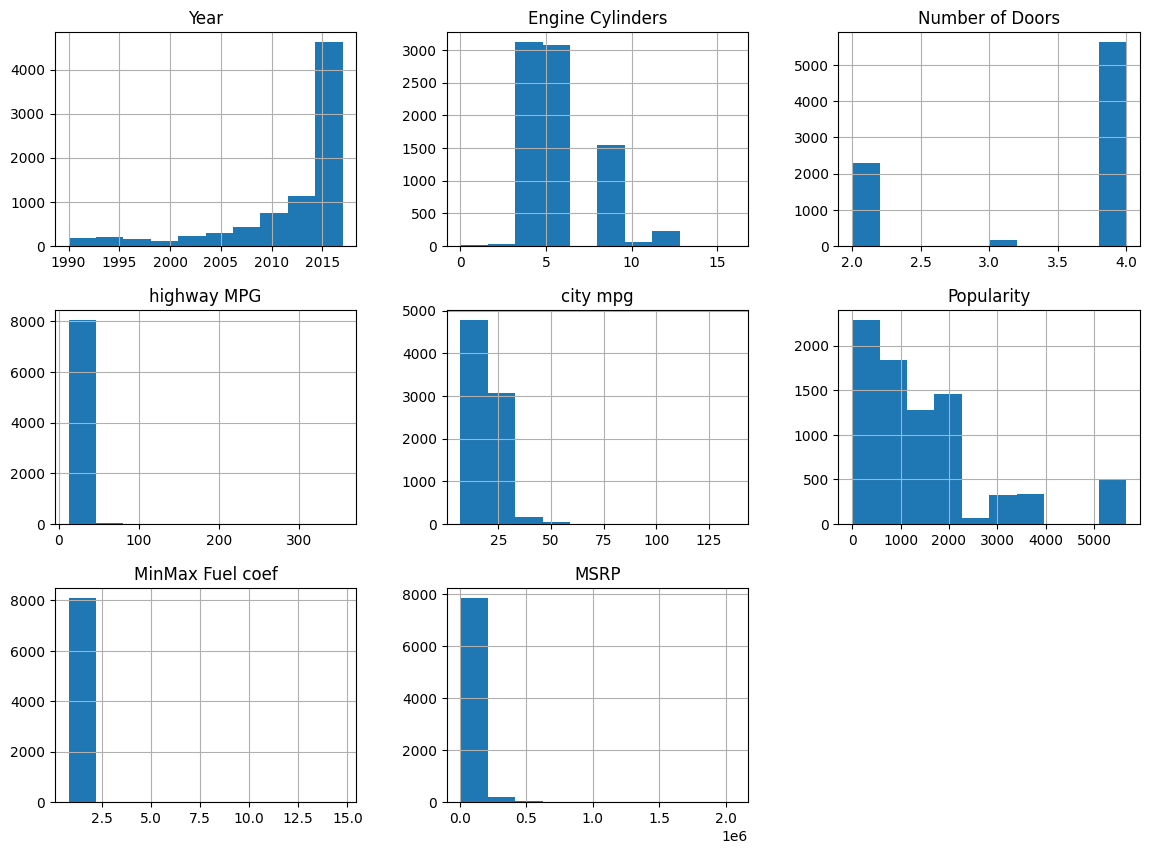

In [ ]:
data1.hist(column=num_cols1+cat_cols1+[target_col1], figsize=(14, 10))

##4.b: Сформулировать гипотезы

Вероятнее всего, избавление от занулённых значений и некоторых категорий изменит результаты обучения в лучшую сторону. Новый добавленный коэффициент даёт не очень много дополнительной информации, поэтому результат его присутствия нужно будет проверить практически.

##4.с: Преобразовать данные

Большая часть преобразований была проделана в пункте 4.a

Добавлю в датафрейм колонки для всех категориальных фичей и обновлю список категориальных фичей

In [ ]:
cat_cols1

['Make',
 'Engine Fuel Type',
 'Transmission Type',
 'Driven_Wheels',
 'Vehicle Size',
 'Vehicle Style']

In [ ]:
#Make
data11 = pd.get_dummies(data1['Make'])
data1 = (data1.drop(columns=['Make'])).join(data11)

new_cat = list(data11.columns)
cat_cols1.remove('Make')
cat_cols1.extend(new_cat)
#Engine Fuel Type
data11 = pd.get_dummies(data1['Engine Fuel Type'])
data1 = (data1.drop(columns=['Engine Fuel Type'])).join(data11)

new_cat = list(data11.columns)
cat_cols1.remove('Engine Fuel Type')
cat_cols1.extend(new_cat)
#Transmission Type
data11 = pd.get_dummies(data1['Transmission Type'])
data1 = (data1.drop(columns=['Transmission Type'])).join(data11)

new_cat = list(data11.columns)
cat_cols1.remove('Transmission Type')
cat_cols1.extend(new_cat)
#Driven_Wheels
data11 = pd.get_dummies(data1['Driven_Wheels'])
data1 = (data1.drop(columns=['Driven_Wheels'])).join(data11)

new_cat = list(data11.columns)
cat_cols1.remove('Driven_Wheels')
cat_cols1.extend(new_cat)
#Vehicle Size
data11 = pd.get_dummies(data1['Vehicle Size'])
data1 = (data1.drop(columns=['Vehicle Size'])).join(data11)

new_cat = list(data11.columns)
cat_cols1.remove('Vehicle Size')
cat_cols1.extend(new_cat)
#Vehicle Style
data11 = pd.get_dummies(data1['Vehicle Style'])
data1 = (data1.drop(columns=['Vehicle Style'])).join(data11)

new_cat = list(data11.columns)
cat_cols1.remove('Vehicle Style')
cat_cols1.extend(new_cat)

In [ ]:
data1.head()

,Year,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,MinMax Fuel coef,Acura,Alfa Romeo,...,Convertible,Convertible SUV,Coupe,Crew Cab Pickup,Extended Cab Pickup,Passenger Minivan,Passenger Van,Regular Cab Pickup,Sedan,Wagon
0,2011,6.0,2.0,26,19,3916,46135,1.368421,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,6.0,2.0,28,19,3916,40650,1.473684,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,6.0,2.0,28,20,3916,36350,1.400000,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,6.0,2.0,28,18,3916,29450,1.555556,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,6.0,2.0,28,18,3916,34500,1.555556,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
cat_cols1

['Acura',
 'Alfa Romeo',
 'Aston Martin',
 'Audi',
 'BMW',
 'Bentley',
 'Bugatti',
 'Buick',
 'Cadillac',
 'Chevrolet',
 'Chrysler',
 'Dodge',
 'FIAT',
 'Ferrari',
 'Ford',
 'GMC',
 'Genesis',
 'HUMMER',
 'Honda',
 'Hyundai',
 'Infiniti',
 'Kia',
 'Lamborghini',
 'Land Rover',
 'Lexus',
 'Lincoln',
 'Lotus',
 'Maserati',
 'Maybach',
 'Mazda',
 'McLaren',
 'Mercedes-Benz',
 'Mitsubishi',
 'Nissan',
 'Oldsmobile',
 'Plymouth',
 'Pontiac',
 'Porsche',
 'Rolls-Royce',
 'Saab',
 'Scion',
 'Spyker',
 'Subaru',
 'Suzuki',
 'Toyota',
 'Volkswagen',
 'Volvo',
 'diesel',
 'electric',
 'flex-fuel (premium unleaded recommended/E85)',
 'flex-fuel (premium unleaded required/E85)',
 'flex-fuel (unleaded/E85)',
 'premium unleaded (recommended)',
 'premium unleaded (required)',
 'regular unleaded',
 'AUTOMATED_MANUAL',
 'AUTOMATIC',
 'DIRECT_DRIVE',
 'MANUAL',
 'UNKNOWN',
 'all wheel drive',
 'four wheel drive',
 'front wheel drive',
 'rear wheel drive',
 'Compact',
 'Large',
 'Midsize',
 '2dr Hatchbac

Список новых признаков

In [ ]:
cat_cols2

['Make',
 'Engine Fuel Type',
 'Transmission Type',
 'Driven_Wheels',
 'Vehicle Size',
 'Vehicle Style']

In [ ]:
#Make
data11 = pd.get_dummies(data2['Make'])
data2 = (data2.drop(columns=['Make'])).join(data11)

new_cat = list(data11.columns)
cat_cols2.remove('Make')
cat_cols2.extend(new_cat)
#Engine Fuel Type
data11 = pd.get_dummies(data2['Engine Fuel Type'])
data2 = (data2.drop(columns=['Engine Fuel Type'])).join(data11)

new_cat = list(data11.columns)
cat_cols2.remove('Engine Fuel Type')
cat_cols2.extend(new_cat)
#Transmission Type
data11 = pd.get_dummies(data2['Transmission Type'])
data2 = (data2.drop(columns=['Transmission Type'])).join(data11)

new_cat = list(data11.columns)
cat_cols2.remove('Transmission Type')
cat_cols2.extend(new_cat)
#Driven_Wheels
data11 = pd.get_dummies(data2['Driven_Wheels'])
data2 = (data2.drop(columns=['Driven_Wheels'])).join(data11)

new_cat = list(data11.columns)
cat_cols2.remove('Driven_Wheels')
cat_cols2.extend(new_cat)
#Vehicle Size
data11 = pd.get_dummies(data2['Vehicle Size'])
data2 = (data2.drop(columns=['Vehicle Size'])).join(data11)

new_cat = list(data11.columns)
cat_cols2.remove('Vehicle Size')
cat_cols2.extend(new_cat)
#Vehicle Style
data11 = pd.get_dummies(data2['Vehicle Style'])
data2 = (data2.drop(columns=['Vehicle Style'])).join(data11)

new_cat = list(data11.columns)
cat_cols2.remove('Vehicle Style')
cat_cols2.extend(new_cat)

In [ ]:
data2.head()

,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Year,MinMax Fuel coef,Acura,Alfa Romeo,...,Convertible,Convertible SUV,Coupe,Crew Cab Pickup,Extended Cab Pickup,Passenger Minivan,Passenger Van,Regular Cab Pickup,Sedan,Wagon
0,6.0,2.0,26,19,3916,46135,2011,1.368421,0,0,...,0,0,1,0,0,0,0,0,0,0
1,6.0,2.0,28,19,3916,40650,2011,1.473684,0,0,...,1,0,0,0,0,0,0,0,0,0
2,6.0,2.0,28,20,3916,36350,2011,1.400000,0,0,...,0,0,1,0,0,0,0,0,0,0
3,6.0,2.0,28,18,3916,29450,2011,1.555556,0,0,...,0,0,1,0,0,0,0,0,0,0
4,6.0,2.0,28,18,3916,34500,2011,1.555556,0,0,...,1,0,0,0,0,0,0,0,0,0


Список новых признаков

In [ ]:
cat_cols2

['Acura',
 'Alfa Romeo',
 'Aston Martin',
 'Audi',
 'BMW',
 'Bentley',
 'Bugatti',
 'Buick',
 'Cadillac',
 'Chevrolet',
 'Chrysler',
 'Dodge',
 'FIAT',
 'Ferrari',
 'Ford',
 'GMC',
 'Genesis',
 'HUMMER',
 'Honda',
 'Hyundai',
 'Infiniti',
 'Kia',
 'Lamborghini',
 'Land Rover',
 'Lexus',
 'Lincoln',
 'Lotus',
 'Maserati',
 'Maybach',
 'Mazda',
 'McLaren',
 'Mercedes-Benz',
 'Mitsubishi',
 'Nissan',
 'Oldsmobile',
 'Plymouth',
 'Pontiac',
 'Porsche',
 'Rolls-Royce',
 'Saab',
 'Scion',
 'Spyker',
 'Subaru',
 'Suzuki',
 'Toyota',
 'Volkswagen',
 'Volvo',
 'diesel',
 'electric',
 'flex-fuel (premium unleaded recommended/E85)',
 'flex-fuel (premium unleaded required/E85)',
 'flex-fuel (unleaded/E85)',
 'premium unleaded (recommended)',
 'premium unleaded (required)',
 'regular unleaded',
 'AUTOMATED_MANUAL',
 'AUTOMATIC',
 'DIRECT_DRIVE',
 'MANUAL',
 'UNKNOWN',
 'all wheel drive',
 'four wheel drive',
 'front wheel drive',
 'rear wheel drive',
 'Compact',
 'Large',
 'Midsize',
 '2dr Hatchbac

Масштабирование признаков

In [ ]:
from sklearn.preprocessing import StandardScaler

pca = StandardScaler()
pca.fit(data1[num_cols1 + cat_cols1])
X1 = pca.transform(data1[num_cols1 + cat_cols1])

pca.fit(data2[num_cols2 + cat_cols2])
X2 = pca.transform(data2[num_cols2 + cat_cols2])

Разделение на train и test

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, data1[target_col1].values, test_size=0.2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, data2[target_col2].values, test_size=0.2)

##4.d: Обучить модели линейной и логистической регрессии

In [ ]:
lr = LinearRegression()
lr.fit(X_train1, y_train1)

print_metrics(lr.predict(X_test1), y_test1)

R^2: 0.789399175561665
MSE: 634440486.6005175


In [ ]:
lr = LogisticRegression()
lr.fit(X_train2, y_train2)

print_metrics(lr.predict(X_test2), y_test2)

R^2: 0.7091972021808679
MSE: 10.78169449598021


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##4.e: Проверить гипотезы

Гипотезы были верны: проделанные проеобразования с данными дают неплохие результаты. Добавление нового параметра мало повлияло на результаты (фиксировал отличие самостоятельно, результаты решил не приводить во избежание путаницы). Но провести данный эксперимент было всё равно интересно.

##4.f: Сравнить результаты моделей с результатами из пункта 3.

Результаты улучшились по обеим задачам (регрессия и классификация) в среднем в 1.5 раза. Это в целом неплохие результаты, которые можно попытаться улучшить в следущих пунктах.

##4.g: Сделать выводы

Вероятнее всего, на улучшение результатов повлияло учитывание категориальных признаков и удаление занулённых значений. От удаления некоторых категорий результаты точно не стали хуже, а скорее всего даже наоборот, т.к. они усложняли пресказывание результатов.

#5. Реализация алгоритмов линейной и логистической регрессии

##5.a: Самостоятельно реализовать алгоритмы

Линейная регрессия для задачи регрессии

In [ ]:
class MyLinR():
  def __init__(self):
    self.coef = []

  def fit(self, X, y):
    self.coef = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

  def predict(self, X):
    return np.dot(self.coef, X.T)

Логистическая регрессия для задачи классификации

In [ ]:
class MyLogR():
    def __init__(self, learning_rate=0.1, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        num_classes = len(np.unique(y))
        num_features = X.shape[1]

        self.weights = np.zeros((num_features, num_classes))
        self.bias = np.zeros((1, num_classes))

        y_one_hot = np.eye(num_classes)[y]

        for _ in range(self.num_iterations):
            linear_combination = np.dot(X, self.weights) + self.bias

            predictions = self.softmax(linear_combination)

            gradient_weights = np.dot(X.T, (predictions - y_one_hot)) / len(y)
            gradient_bias = np.sum(predictions - y_one_hot, axis=0, keepdims=True) / len(y)

            self.weights -= self.learning_rate * gradient_weights
            self.bias -= self.learning_rate * gradient_bias

    def predict(self, X):
        linear_combination = np.dot(X, self.weights) + self.bias
        predictions = self.softmax(linear_combination)
        return np.argmax(predictions, axis=1)

##5.b: Сравнить результаты моделей с результатами из пункта 4

In [ ]:
lr = MyLinR()
lr.fit(X_train1, y_train1)

print_metrics(lr.predict(X_test1), y_test1)

R^2: -0.01847025514925771
MSE: 5072419750.625781


In [ ]:
lr = MyLogR()
lr.fit(X_train2, y_train2 - np.min(data2['Year']))

print_metrics(lr.predict(X_test2), y_test2 - np.min(data2['Year']))

R^2: 0.3810546553286114
MSE: 18.027210884353742


##5.c: Сделать выводы

Собственные реализации работают хуже встроенных (особенно линейная регрессия). Это связано с тем, что встроенные реализации более детально проработанны и учитывают довольно большое количество параметров. Мои же реализации более упрощённые и дают не такой хороший результат.

#6. Определить пайплайн решения

В прошлых пунктах мною были проверены выдвинутые гипотезы, реализованы некоторые модели, было произведено сравнение значений их результатов со встроенными аналогами, а также были сформулированы выводы. С этими знаниями осталось перейти к завершающему пункту и получить новые результаты.

#7. Реализация алгоритмов

##7.a: Самостоятельно реализовать алгоритмы

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

Дерево решений для задачи регрессии

In [ ]:
class MyDecisionTreeRegressor():
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        unique_values, unique_counts = np.unique(y, return_counts=True)

        if len(unique_values) == 1 or n_samples < self.min_samples_split or (self.max_depth and depth == self.max_depth):
            return {'value': np.mean(y)}

        best_feature, best_threshold = self._find_best_split(X, y)

        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask

        left_subtree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return {'feature_index': best_feature, 'threshold': best_threshold,
                'left': left_subtree, 'right': right_subtree}

    def _find_best_split(self, X, y):
        n_samples, n_features = X.shape
        best_mse = float('inf')
        best_feature = None
        best_threshold = None

        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])

            for threshold in thresholds:
                left_mask = X[:, feature_index] <= threshold
                right_mask = ~left_mask

                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue

                mse = self._calculate_mse(y[left_mask], y[right_mask])

                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature_index
                    best_threshold = threshold

        return best_feature, best_threshold

    def _calculate_mse(self, y_left, y_right):
        mse_left = np.mean((y_left - np.mean(y_left))**2)
        mse_right = np.mean((y_right - np.mean(y_right))**2)
        mse = mse_left + mse_right
        return mse

    def _predict_tree(self, x, node):
        if 'value' in node:
            return node['value']

        if x[node['feature_index']] <= node['threshold']:
            return self._predict_tree(x, node['left'])
        else:
            return self._predict_tree(x, node['right'])

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree) for x in X])

Дерево решений для задачи классификации

In [ ]:
class MyDecisionTreeClassifier():
    def __init__(self, max_depth=3):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        unique_classes = list(set(y))

        if len(unique_classes) == 1:
            return {'class': unique_classes[0]}

        if self.max_depth is not None and depth == self.max_depth:
            most_common_class = max(set(y))
            return {'class': most_common_class}

        best_split = self._find_best_split(X, y)

        if best_split is None:
            print(type(y))
            most_common_class = max(set(y))
            return {'class': most_common_class}

        left_child = self._build_tree(*best_split['left'], depth=depth + 1)
        right_child = self._build_tree(*best_split['right'], depth=depth + 1)

        return {'feature_idx': best_split['feature_idx'],
                'threshold': best_split['threshold'],
                'left': left_child,
                'right': right_child}

    def _find_best_split(self, X, y):
        num_features = len(X[0])
        m = len(y)
        if m <= 1:
            return None

        num_classes = len(set(y))

        best_gini = float('inf')
        best_split = None

        for feature_idx in range(num_features):
            feature_values = sorted(set(X[i][feature_idx] for i in range(m)))

            for threshold in feature_values:
                left_indices = [i for i in range(m) if X[i][feature_idx] <= threshold]
                right_indices = [i for i in range(m) if X[i][feature_idx] > threshold]

                gini_left = self._compute_gini(y[left_indices])
                gini_right = self._compute_gini(y[right_indices])

                weighted_gini = (len(left_indices) / m) * gini_left + (len(right_indices) / m) * gini_right

                if weighted_gini < best_gini:
                    best_gini = weighted_gini
                    best_split = {'feature_idx': feature_idx, 'threshold': threshold, 'left': (X[left_indices], y[left_indices]), 'right': (X[right_indices], y[right_indices])}

        return best_split

    def _compute_gini(self, y):
        m = len(y)
        if m == 0:
            return 0

        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / m
        gini = 1 - np.sum(probabilities ** 2)

        return gini

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree) for x in X])

    def _predict_tree(self, x, node):
        if 'class' in node:
            return node['class']

        if x[node['feature_idx']] <= node['threshold']:
            return self._predict_tree(x, node['left'])
        else:
            return self._predict_tree(x, node['right'])

In [ ]:
dtr = MyDecisionTreeRegressor()
dtr.fit(X_train1, y_train1)

print_metrics(dtr.predict(X_test1), y_test1)

R^2: -2540.9416702578465
MSE: 3095074629.348214


In [ ]:
dtr = MyDecisionTreeClassifier()
dtr.fit(X_train2, y_train2)

print_metrics(dtr.predict(X_test2), y_test2)

R^2: -0.35543827356657687
MSE: 27.03339517625232


Случайный лес для задачи регрессии

In [ ]:
class MyRandomForestRegressor():
    def __init__(self, n_trees=100, max_depth=None, min_samples_split=2, subsample_size=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.subsample_size = subsample_size
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        n_samples = X.shape[0]

        for _ in range(self.n_trees):
            if self.subsample_size:
                indices = np.random.choice(n_samples, size=self.subsample_size, replace=True)
                X_subset, y_subset = X[indices], y[indices]
            else:
                X_subset, y_subset = X, y

            tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_subset, y_subset)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)

Случайный лес для задачи классификации

In [ ]:
class MyRandomForestClassifier():
    def __init__(self, n_trees=3, max_depth=1, sample_size=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.sample_size = sample_size
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            tree = MyDecisionTreeClassifier(max_depth=self.max_depth)
            if self.sample_size:
                sample_indices = np.random.choice(len(X), size=self.sample_size, replace=True)
                X_sample, y_sample = X[sample_indices], y[sample_indices]
            else:
                X_sample, y_sample = X, y
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

In [ ]:
rfr = MyRandomForestRegressor()
rfr.fit(X_train1, y_train1)

print_metrics(rfr.predict(X_test1), y_test1)

R^2: 0.9195854045488892
MSE: 298191676.73651963


In [ ]:
rfr = MyRandomForestClassifier()
rfr.fit(X_train2, y_train2)

print_metrics(rfr.predict(X_test2), y_test2)

R^2: -0.5609720670678218
MSE: 27.875077303648734


Градиентный бустинг для задачи регрессии

In [ ]:
class MyGradientBoostingRegressor():
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        predictions = np.zeros_like(y, dtype=np.float64)

        for i in range(self.n_estimators):
            residuals = y - predictions

            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)

            tree_predictions = tree.predict(X)

            predictions += (self.learning_rate * tree_predictions)

            self.trees.append(tree)

    def predict(self, X):
        predictions = np.zeros(X.shape[0])
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
        return predictions

Градиентный бустниг для задачи классификации

In [ ]:
class MyGradientBoostingClassifier():
    def __init__(self, n_estimators=3, learning_rate=0.1, max_depth=1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        predictions = np.zeros_like(y, dtype=np.float64)

        for i in range(self.n_estimators):
            residuals = y - predictions

            tree = MyDecisionTreeClassifier(max_depth=self.max_depth)
            tree.fit(X, residuals)

            tree_predictions = tree.predict(X)

            predictions += (self.learning_rate * tree_predictions)

            self.trees.append(tree)

    def predict(self, X):
        predictions = np.zeros(X.shape[0])
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
        return predictions

In [ ]:
gbr = MyGradientBoostingRegressor()
gbr.fit(X_train1, y_train1)

print_metrics(gbr.predict(X_test1), y_test1)

R^2: 0.8631605835135363
MSE: 408652840.0614469


In [ ]:
gbr = MyGradientBoostingClassifier()
gbr.fit(X_train2, y_train2)

print_metrics(gbr.predict(X_test2), y_test2)

R^2: -1638470.59779612
MSE: 2148812.135654333


Для задачи регрессии все вышеперечисленные алгоритмы (кроме дерева решений, видимо проблема в реализации) справляются лучше, чем линейная регрессия. К сожалению, для задачи классификации мои реализации работали очень долго, поэтому пришлось уменьшить значения параметров, из-за чего результаты получились несколько хуже результатов логистической регрессии.

Для задачи регресии: среди трёх моделей лучшие результаты показал алгоритм случайного леса.

Для задачи классификации: среди трёх моделей лучшие результаты показал алгоритм дерева решений.

##7.b: Обучить модели из sklearn

Дерево решений

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train1, y_train1)

print_metrics(dtr.predict(X_test1), y_test1)

R^2: 0.9154853581938048
MSE: 311311892.9152348


In [ ]:
dtr = DecisionTreeClassifier()
dtr.fit(X_train2, y_train2)

print_metrics(dtr.predict(X_test2), y_test2)

R^2: 0.9396700788324358
MSE: 2.30117501546073


Случайный лес

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train1, y_train1)

print_metrics(rfr.predict(X_test1), y_test1)

R^2: 0.9350734404207566
MSE: 220440343.19026542


In [ ]:
rfr = RandomForestClassifier()
rfr.fit(X_train2, y_train2)

print_metrics(rfr.predict(X_test2), y_test2)

R^2: 0.954600024611218
MSE: 1.7606679035250463


Градиентный бустниг

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train1, y_train1)

print_metrics(gbr.predict(X_test1), y_test1)

R^2: 0.8639920813034498
MSE: 406847984.63995093


In [ ]:
gbr = GradientBoostingClassifier()
gbr.fit(X_train2, y_train2)

print_metrics(gbr.predict(X_test2), y_test2)

R^2: 0.8629854800966031
MSE: 5.233766233766234


В данном случае также все встроенные модели показали результаты лучше, чем линейная и логистическая регрессия. Объясняется это тем, что данные алгоритмы более детально и качественно подходят к решению задачи (например, они используют глубокий анализ).

##7.c: Сравнить результаты моделей с результатми из пункта 7.a

Для задачи регрессии: встроенная модель алгоритма случайного леса работает лучше моей реализации примерно в 1.5 раза. Объясняется это, опять же, тем, что встроенные функции лучше оптимизированны и проработанны, чем пользовательские. Однако, встроенный алгоритм дерева решений показал очень схожие результаты с моей реализацией. Видимо, моя реализация очень хорошо подстроилась под датасет и смогла выдать вполне оптимальный результат.

Для задачи классификации: все встроенные модели алгоритмов оказались лучше, чем мои реализации. Объяснение то же, что и для других случаев: улучшенная оптимизация встренных методов. Также пришлось уменьшить параметры для экономии времени, что очень сильно повлияло на итоговые результаты.